In [37]:
# plot a series of write speed data from text files on S3
%load_ext autoreload
%autoreload 2   
from write import s3_path, writer_types
import pandas as pd 
from noisepy.seis.utils import get_filesystem
import matplotlib.pyplot as plt
writes = 5000
fs = get_filesystem(s3_path, storage_options={"client_kwargs": {"region_name": "us-west-2"}})

def read_write_speed(df, writer_type: str) -> pd.DataFrame:
    path = f"{s3_path}{writes}/{writer_type}/times.txt"
    with fs.open(path, "r") as f:
        temp = pd.read_csv(f, header=None, names=["time"])    
        df[writer_type] = temp["time"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of write failed: Traceback (most recent call last):
  File "/Users/carlosg/repos/NoisePy/.env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/carlosg/repos/NoisePy/.env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/carlosg/repos/NoisePy/.env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/carlosg/repos/NoisePy/.env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "/Users/carlosg/repos/NoisePy/.env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/carlosg/repos/NoisePy/.env/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 309, in upda

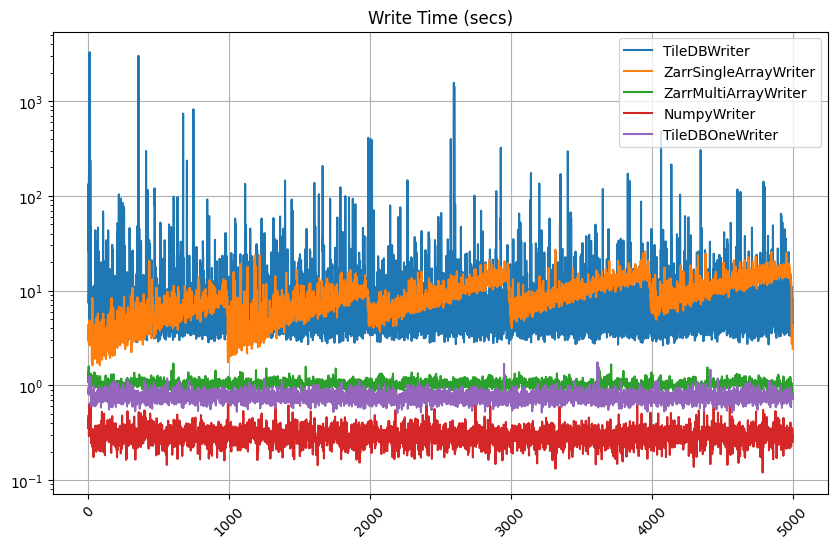

In [38]:
df = pd.DataFrame()
for w in writer_types:
    read_write_speed(df, w.__name__)    
plt.figure(figsize=(10, 6))
plt.yscale('log')
for w in reversed(writer_types):
    plt.plot(df[w.__name__], label=w.__name__)
plt.legend(loc='upper right')
plt.title(f'Write Time (secs)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:

# Data from the log files
head= ["Writer", "Mean", "Std", "Min", "Max", "Total"]
data = [["TileDBWriter", 13.088, 88.04347204699665, 2.6451938152313232, 3273.6684687137604, 3275.7281470298767],
["ZarrSingleArrayWriter", 8.533, 3.7834072094860067, 1.6261281967163086, 27.117829084396362, 2135.860640525818],
["ZarrMultiArrayWriter", 1.034, 0.08894374031923517, 0.7130992412567139, 1.7014696598052979, 258.7989716529846],
["NumpyWriter", 0.294, 0.05973566457597793, 0.119953, 0.8013498783111572, 73.5780930519104],
"TileDBOneWriter", 0.755, 0.09461736400099405,0.5088777542114258,1.75008225440979,188.89991879463196]
]

df_sum = pd.DataFrame(data, columns=head)
md = df_sum.to_markdown()
md